In [1]:
import VeryAccurateEmulator

In [2]:
em = VeryAccurateEmulator.VeryAccurateEmulator()

In [11]:
from tensorflow.keras.models import Model

In [31]:
vae_latent_layer = Model(inputs=em.vae.input,outputs=em.vae.get_layer("z_mean").output)
vae_log_var_layer = Model(inputs=em.vae.input,outputs=em.vae.get_layer("z_log_var").output)

In [16]:
emulator_latent_layer = Model(inputs=em.emulator.input,outputs=em.emulator.get_layer("em_autoencoder").output)

In [19]:
from preprocess import preproc, unpreproc

In [32]:
signal_test_preproc = preproc(em.signal_test, em.signal_train)
latent_vae = vae_latent_layer.predict(signal_test_preproc)
logvar_vae = vae_log_var_layer.predict(signal_test_preproc)
latent_em = emulator_latent_layer.predict(em.par_test)

In [26]:
diff = latent_vae-latent_em

In [28]:
import numpy as np

In [36]:
st_dev = np.exp(logvar_vae/2)

In [40]:
for i in range(10):
    print(np.sort(st_dev[i, :])[::-1])

[0.99714124 0.9969785  0.9968625  0.9961355  0.99611497 0.99596566
 0.9954548  0.9950529  0.99466467 0.99442625 0.99397624 0.99394536
 0.9936112  0.9935365  0.9931444  0.99237096 0.9917441  0.991575
 0.9898767  0.98684317 0.07484169 0.06429434]
[0.9927032  0.9920415  0.99187464 0.9912814  0.9911364  0.990241
 0.9895254  0.98930675 0.98824555 0.9859246  0.9858269  0.98581517
 0.98495644 0.9848869  0.9842982  0.98244613 0.98226476 0.9820121
 0.9808526  0.9698205  0.0570423  0.04610545]
[0.997219   0.9971283  0.99616706 0.9958355  0.99575543 0.9957249
 0.9953837  0.9951319  0.99502075 0.9945649  0.99342406 0.9934145
 0.99327755 0.9925393  0.991474   0.99088615 0.99084073 0.9887191
 0.9883071  0.98464614 0.09255704 0.05938757]
[0.99473935 0.99423105 0.99380004 0.9933648  0.99297094 0.9928962
 0.9923605  0.99202526 0.9910856  0.9899354  0.98928636 0.98875415
 0.98841447 0.9882537  0.98748684 0.9871215  0.98643714 0.9855074
 0.98435086 0.97664124 0.06198692 0.0583473 ]
[0.9963457  0.99614656

In [42]:
import matplotlib.pyplot as plt

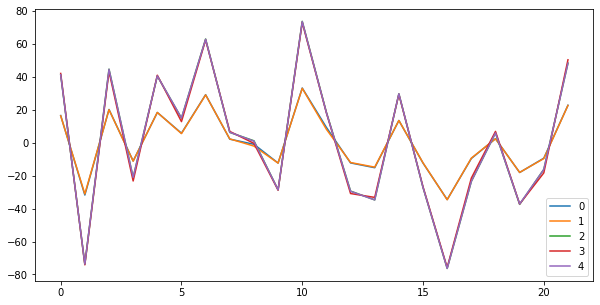

In [64]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot((diff[i, :]), label=str(i))
plt.legend()
plt.show()

In [67]:
st_dev[0, 11]

0.06429434

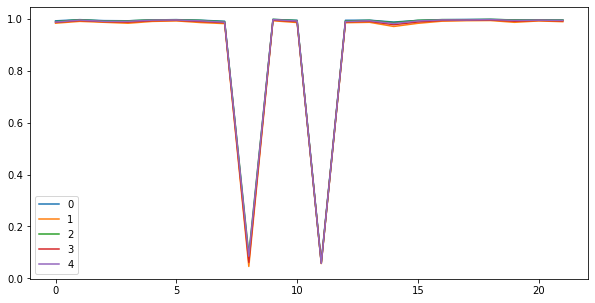

In [50]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(st_dev[i, :], label=str(i))
plt.legend()
plt.show()

In [72]:
print(diff[0, 8])
print(diff[0, 11])
print(diff[0, 8]/st_dev[0, 8])
print(diff[0, 11]/st_dev[0, 11])

-0.99888635
9.24649
-13.346658
143.81499


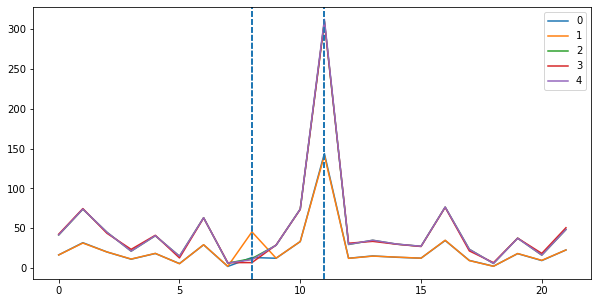

In [74]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(np.abs(diff[i, :])/st_dev[i, :], label=str(i))
    plt.axvline(8, ls='--')
    plt.axvline(11, ls='--')
plt.legend()
plt.show()

In [82]:
from sklearn.decomposition import PCA
latent_PCA = PCA()
latent_PCA.fit(latent_vae)
latentvae_PCA = latent_PCA.transform(latent_vae)
latent_PCA.explained_variance_ratio_

array([6.34386659e-01, 3.65584731e-01, 2.85489859e-05, 1.32980401e-16,
       1.54381908e-18, 1.38152831e-18, 9.06991134e-19, 3.99122452e-19,
       2.77027362e-19, 1.88169411e-19, 1.71180814e-19, 1.29940432e-19,
       1.05373175e-19, 6.83153863e-20, 5.67239234e-20, 5.58823059e-20,
       4.77614861e-20, 4.20195537e-20, 3.27408071e-20, 2.29694356e-20,
       1.48676296e-20, 7.85451370e-21], dtype=float32)

In [88]:
latent_PCA_em = PCA()
latent_PCA_em.fit(latent_em)
latentem_PCA = latent_PCA_em.transform(latent_em)
latent_PCA_em.explained_variance_ratio_

array([9.9720186e-01, 1.4310420e-03, 6.8746862e-04, 3.7646751e-04,
       1.8111606e-04, 6.8940724e-05, 2.7364416e-05, 1.0482884e-05,
       7.3687820e-06, 2.9932219e-06, 1.5519679e-06, 1.3446290e-06,
       1.0433962e-06, 2.8806019e-07, 2.4802398e-07, 1.4928762e-07,
       9.6379544e-08, 9.2435322e-08, 6.9574149e-08, 4.6345615e-08,
       3.1882863e-08, 1.7066421e-08], dtype=float32)

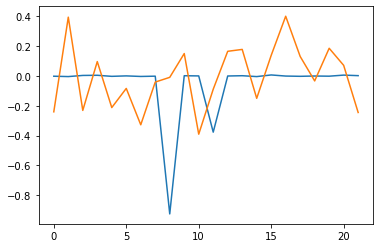

In [89]:
plt.plot(latent_PCA.components_[0,:])
plt.plot(latent_PCA_em.components_[0,:])

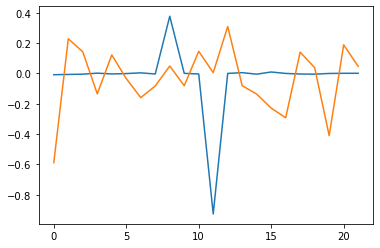

In [90]:
plt.plot(latent_PCA.components_[1,:])
plt.plot(latent_PCA_em.components_[1,:])

In [57]:
em.par_labels

['fstar', 'Vc', 'fx', 'tau', 'alpha', 'nu_min', 'Rmfp']

In [75]:
fstar_smooth

array([3.48339614e-06, 1.00539533e-02, 2.01044231e-02, 3.01548930e-02,
       4.02053629e-02, 5.02558327e-02, 6.03063026e-02, 7.03567724e-02,
       8.04072423e-02, 9.04577122e-02, 1.00508182e-01, 1.10558652e-01,
       1.20609122e-01, 1.30659592e-01, 1.40710062e-01, 1.50760531e-01,
       1.60811001e-01, 1.70861471e-01, 1.80911941e-01, 1.90962411e-01,
       2.01012881e-01, 2.11063351e-01, 2.21113820e-01, 2.31164290e-01,
       2.41214760e-01, 2.51265230e-01, 2.61315700e-01, 2.71366170e-01,
       2.81416640e-01, 2.91467109e-01, 3.01517579e-01, 3.11568049e-01,
       3.21618519e-01, 3.31668989e-01, 3.41719459e-01, 3.51769929e-01,
       3.61820399e-01, 3.71870868e-01, 3.81921338e-01, 3.91971808e-01,
       4.02022278e-01, 4.12072748e-01, 4.22123218e-01, 4.32173688e-01,
       4.42224157e-01, 4.52274627e-01, 4.62325097e-01, 4.72375567e-01,
       4.82426037e-01, 4.92476507e-01, 5.02526977e-01, 5.12577446e-01,
       5.22627916e-01, 5.32678386e-01, 5.42728856e-01, 5.52779326e-01,
      

In [58]:
theta0 = np.expand_dims(1/2 * (np.min(em.par_train, axis=0) + np.max(em.par_train, axis=0)), axis=0)  # mean param
num_signals = 100
theta0_arr = np.tile(theta0, (num_signals, 1))

# range
ep_min = 0.01
ep_max = 1.99

# fstar:
fstar_smooth = np.linspace(ep_min*em.par_test[:, 0].min(), ep_max*em.par_test[:, 0].max(), num=num_signals)
theta0_fstar = theta0_arr.copy()
theta0_fstar[:, 0] = fstar_smooth

# vc:
vc_smooth = np.linspace(ep_min*em.par_test[:, 1].min(), ep_max*em.par_test[:, 1].max(), num=num_signals)
theta0_vc = theta0_arr.copy()
theta0_vc[:, 1] = vc_smooth

# fx:
fx_smooth = np.linspace(ep_min*em.par_test[:, 2].min(), ep_max*em.par_test[:, 2].max(), num=num_signals)
theta0_fx = theta0_arr.copy()
theta0_fx[:, 2] = fx_smooth

# tau:
tau_smooth = np.linspace(ep_min*em.par_test[:, 3].min(), ep_max*em.par_test[:, 3].max(), num=num_signals)
theta0_tau = theta0_arr.copy()
theta0_tau[:, 2] = tau_smooth

# alpha:
alpha_smooth = np.linspace(ep_min*em.par_test[:, 4].min(), ep_max*em.par_test[:, 4].max(), num=num_signals)
theta0_alpha = theta0_arr.copy()
theta0_alpha[:, 4] = alpha_smooth

# nu_min:
nu_min_smooth = np.linspace(ep_min*em.par_test[:, 5].min(), ep_max*em.par_test[:, 5].max(), num=num_signals)
theta0_nu_min = theta0_arr.copy()
theta0_nu_min[:, 5] = nu_min_smooth

# rmfp:
rmfp_smooth = np.linspace(ep_min*em.par_test[:, 6].min(), ep_max*em.par_test[:, 6].max(), num=num_signals)
theta0_rmfp = theta0_arr.copy()
theta0_rmfp[:, 6] = rmfp_smooth

In [59]:
fstar_pred = em.predict(theta0_fstar)
vc_pred = em.predict(theta0_vc)
fx_pred = em.predict(theta0_fx)
tau_pred = em.predict(theta0_tau)
alpha_pred = em.predict(theta0_alpha)
nu_min_pred = em.predict(theta0_nu_min)
rmfp_pred = em.predict(theta0_rmfp)

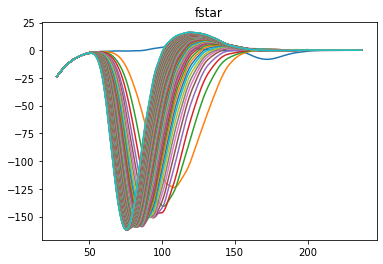

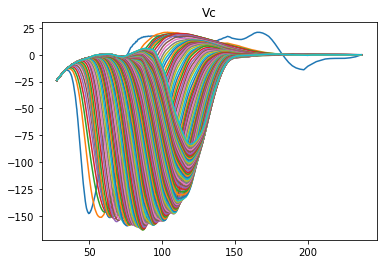

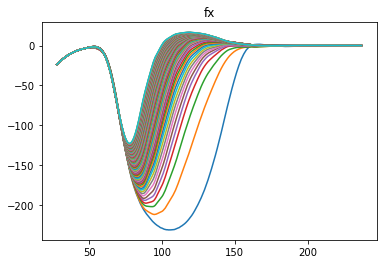

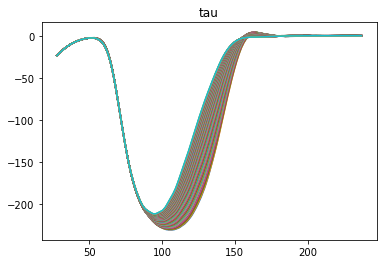

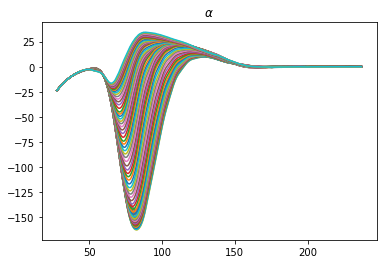

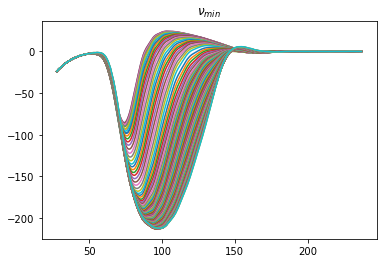

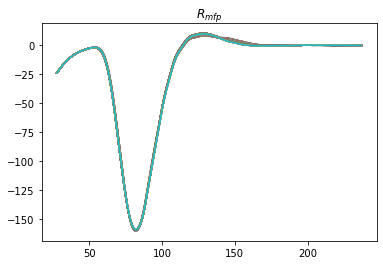

In [60]:
plt.figure()
for i in range(num_signals):
    plt.title(em.par_labels[0])
    plt.plot(em.nu_sampling, fstar_pred[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(em.par_labels[1])
    plt.plot(em.nu_sampling, vc_pred[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(em.par_labels[2])
    plt.plot(em.nu_sampling, fx_pred[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(em.par_labels[3])
    plt.plot(em.nu_sampling, tau_pred[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(r'$\alpha$')
    plt.plot(em.nu_sampling, alpha_pred[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(r'$\nu_{min}$')
    plt.plot(em.nu_sampling, nu_min_pred[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(r'$R_{mfp}$')
    plt.plot(em.nu_sampling, rmfp_pred[i])
plt.show()

In [61]:
direct = VeryAccurateEmulator.DirectEmulator()

In [62]:
fstar_pred_direct = direct.predict(theta0_fstar)
vc_pred_direct = direct.predict(theta0_vc)
fx_pred_direct = direct.predict(theta0_fx)
tau_pred_direct = direct.predict(theta0_tau)
alpha_pred_direct = direct.predict(theta0_alpha)
nu_min_pred_direct = direct.predict(theta0_nu_min)
rmfp_pred_direct = direct.predict(theta0_rmfp)

In [78]:
em.par_train.shape[0] + em.par_val.shape[0]

27292

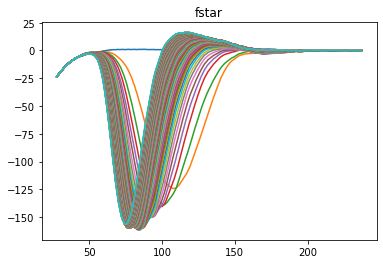

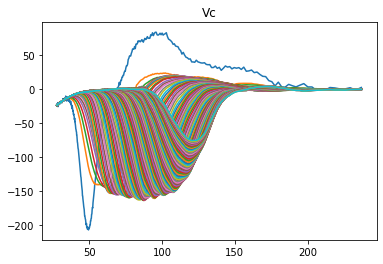

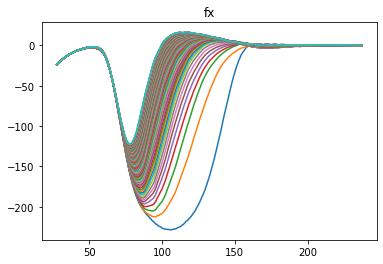

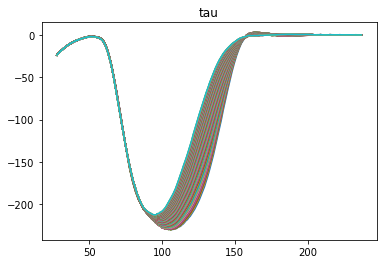

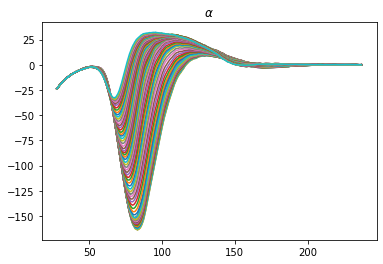

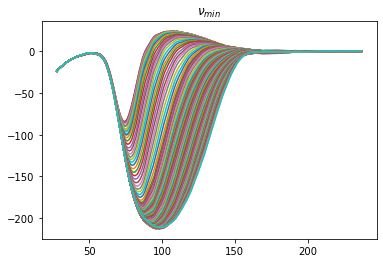

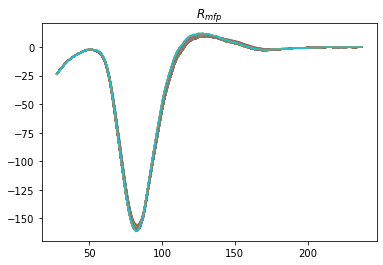

In [63]:
plt.figure()
for i in range(num_signals):
    plt.title(em.par_labels[0])
    plt.plot(em.nu_sampling, fstar_pred_direct[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(em.par_labels[1])
    plt.plot(em.nu_sampling, vc_pred_direct[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(em.par_labels[2])
    plt.plot(em.nu_sampling, fx_pred_direct[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(em.par_labels[3])
    plt.plot(em.nu_sampling, tau_pred_direct[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(r'$\alpha$')
    plt.plot(em.nu_sampling, alpha_pred_direct[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(r'$\nu_{min}$')
    plt.plot(em.nu_sampling, nu_min_pred_direct[i])
plt.show()

plt.figure()
for i in range(num_signals):
    plt.title(r'$R_{mfp}$')
    plt.plot(em.nu_sampling, rmfp_pred_direct[i])
plt.show()